In [1]:
import numpy as np
import gc
import tensorflow as tf
from tensorflow import keras
K = keras.backend
import seaborn as sb
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import importlib as imp 
import matplotlib as mpl
plt = mpl.pyplot
import time
import warnings
from save_load import save_model, load_model

import experiments
import directories
import data_methods
import network_methods
import metrics
import plot

from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']

params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

In [ ]:
BASE_EXPERIMENTS = ["main_leave" + str(ileave) for ileave in range(5)]
base_dirs = directories.get_dirs()
Ate_list, Fte_list, Ite_list, Xte_list, Tte_list, PIte_list, PFte_list, PIob_list, PFob_list, Pte_list = [],[],[],[],[],[],[],[],[],[]
for BASE in BASE_EXPERIMENTS:
    EXPERIMENTS = [BASE + '_seed' + str(iseed) for iseed in range(10)]
    Ate_leavelist, Fte_leavelist, Ite_leavelist, Xte_leavelist, Tte_leavelist, PIte_leavelist, PFte_leavelist, \
    PIob_leavelist, PFob_leavelist, Pte_leavelist = [],[],[],[],[],[],[],[],[],[]

    for EXP in EXPERIMENTS:
        # Open the neural network
        model_list, settings_list = load_model(EXP, base_dirs)
        this_model = model_list[0]
        this_settings = settings_list[0]
        network_methods.compile_CVED(this_model, this_settings)
        # Prepare the data
        sommin, sommin2, sommin3, __, __, __, __, __, __, __, \
            __, __, __, __, __, somminTtr, __, __, __, \
            __, __, __, __, __ = data_methods.prepare_data(this_settings, base_dirs)
        print(sommin.shape)
        import nada

## Leave-one-out Cross validation Performance and Results

Open data

In [ ]:
BASE_EXPERIMENTS = ["main_leave" + str(ileave) for ileave in range(5)]
base_dirs = directories.get_dirs()
Ate_list, Fte_list, Ite_list, Xte_list, Tte_list, PIte_list, PFte_list, PIob_list, PFob_list, Pte_list = [],[],[],[],[],[],[],[],[],[]
for BASE in BASE_EXPERIMENTS:
    EXPERIMENTS = [BASE + '_seed' + str(iseed) for iseed in range(10)]
    Ate_leavelist, Fte_leavelist, Ite_leavelist, Xte_leavelist, Tte_leavelist, PIte_leavelist, PFte_leavelist, \
    PIob_leavelist, PFob_leavelist, Pte_leavelist = [],[],[],[],[],[],[],[],[],[]

    for EXP in EXPERIMENTS:
        # Open the neural network
        model_list, settings_list = load_model(EXP, base_dirs)
        this_model = model_list[0]
        this_settings = settings_list[0]
        network_methods.compile_CVED(this_model, this_settings)
        # Prepare the data
        Atr, Ava, Ate, Aob, Ftr, Fva, Fte, Itr, Iva, Ite, \
            Xtr, Xva, Xte, Xob, Xshapes, Ttr, Tva, Tte, Tshapes, \
            Tmean, Tstd, lats, lons, M = data_methods.prepare_data(this_settings, base_dirs)
        
        

        # Test set predictions
        Pte = this_model.predict(Xte)
        _ = gc.collect()
        PIte = data_methods.unstandardize_predictions(Pte, Tmean, Tstd, Tshapes[2], M)
        PFte = Ate[..., 0:1] - PIte

        # Predictions for observations
        Pob = this_model.predict(Xob)
        _ = gc.collect()
        PIob = data_methods.unstandardize_predictions(Pob, Tmean, Tstd, Aob.shape, M)
        PFob = Aob[..., 0:1] - PIob

        # Add to the lists
        PIte_leavelist.append(PIte)
        PFte_leavelist.append(PFte)
        PIob_leavelist.append(PIob)
        PFob_leavelist.append(PFob)

    Ate_list.append(Ate)
    Fte_list.append(Fte)
    Ite_list.append(Ite)
    PIte_list.append(np.mean(PIte_leavelist, axis=0))
    PFte_list.append(np.mean(PFte_leavelist, axis=0))
    PIob_list.append(np.mean(PIob_leavelist, axis=0))
    PFob_list.append(np.mean(PFob_leavelist, axis=0))

Ate_list = np.array(Ate_list)
Fte_list = np.array(Fte_list)
Ite_list = np.array(Ite_list)
PIte_list = np.array(PIte_list)
PFte_list = np.array(PFte_list)
PIob_list = np.array(PIob_list)
PFob_list = np.array(PFob_list)

settings = this_settings

saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_metadata.json
saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 128ms/step
saved_models/main_leave0_seed1/2024-07-11_0236//main_leave0_seed1_seed1_metadata.json
saved_models/main_leave0_seed1/2024-07-11_0236//main_leave0_seed1_seed1_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 146ms/step
saved_models/main_leave0_seed2/2024-07-11_0236//main_leave0_seed2_seed2_metadata.json
saved_models/main_leave0_seed2/2024-07-11_0236//main_leave0_seed2_seed2_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 132ms/step
saved_models/main_leave0_seed3/2024-07-11_0236//main_leave0_seed3_seed3_metadata.json
saved_models/main_leave0_seed3/2024-07-11_0236//main_leave0_seed3_seed3_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 139ms/step
saved_models/main_leave0_seed4/2024-07-11_0236//main_leave0_seed4_seed4_metadata.json
saved_models/main_leave0_seed4/2024-07-11_0236//main_leave0_seed4_seed4_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 134ms/step
saved_models/main_leave0_seed5/2024-07-11_0236//main_leave0_seed5_seed5_metadata.json
saved_models/main_leave0_seed5/2024-07-11_0236//main_leave0_seed5_seed5_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 137ms/step
saved_models/main_leave0_seed6/2024-07-11_0236//main_leave0_seed6_seed6_metadata.json
saved_models/main_leave0_seed6/2024-07-11_0236//main_leave0_seed6_seed6_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 144ms/step
saved_models/main_leave0_seed7/2024-07-11_0236//main_leave0_seed7_seed7_metadata.json
saved_models/main_leave0_seed7/2024-07-11_0236//main_leave0_seed7_seed7_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 135ms/step
saved_models/main_leave0_seed8/2024-07-11_0236//main_leave0_seed8_seed8_metadata.json
saved_models/main_leave0_seed8/2024-07-11_0236//main_leave0_seed8_seed8_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 132ms/step
saved_models/main_leave0_seed9/2024-07-11_0236//main_leave0_seed9_seed9_metadata.json
saved_models/main_leave0_seed9/2024-07-11_0236//main_leave0_seed9_seed9_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 144ms/step
saved_models/main_leave1_seed0/2024-07-11_0236//main_leave1_seed0_seed0_metadata.json
saved_models/main_leave1_seed0/2024-07-11_0236//main_leave1_seed0_seed0_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 138ms/step
saved_models/main_leave1_seed1/2024-07-11_0236//main_leave1_seed1_seed1_metadata.json
saved_models/main_leave1_seed1/2024-07-11_0236//main_leave1_seed1_seed1_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 151ms/step
saved_models/main_leave1_seed2/2024-07-11_0236//main_leave1_seed2_seed2_metadata.json
saved_models/main_leave1_seed2/2024-07-11_0236//main_leave1_seed2_seed2_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 136ms/step
saved_models/main_leave1_seed3/2024-07-11_0236//main_leave1_seed3_seed3_metadata.json
saved_models/main_leave1_seed3/2024-07-11_0236//main_leave1_seed3_seed3_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 148ms/step
saved_models/main_leave1_seed4/2024-07-11_0236//main_leave1_seed4_seed4_metadata.json
saved_models/main_leave1_seed4/2024-07-11_0236//main_leave1_seed4_seed4_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 127ms/step
saved_models/main_leave1_seed5/2024-07-11_0236//main_leave1_seed5_seed5_metadata.json
saved_models/main_leave1_seed5/2024-07-11_0236//main_leave1_seed5_seed5_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 128ms/step
saved_models/main_leave1_seed6/2024-07-11_0236//main_leave1_seed6_seed6_metadata.json
saved_models/main_leave1_seed6/2024-07-11_0236//main_leave1_seed6_seed6_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 133ms/step
saved_models/main_leave1_seed7/2024-07-11_0236//main_leave1_seed7_seed7_metadata.json
saved_models/main_leave1_seed7/2024-07-11_0236//main_leave1_seed7_seed7_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 131ms/step
saved_models/main_leave1_seed8/2024-07-11_0236//main_leave1_seed8_seed8_metadata.json
saved_models/main_leave1_seed8/2024-07-11_0236//main_leave1_seed8_seed8_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 132ms/step
saved_models/main_leave1_seed9/2024-07-11_0236//main_leave1_seed9_seed9_metadata.json
saved_models/main_leave1_seed9/2024-07-11_0236//main_leave1_seed9_seed9_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 132ms/step
saved_models/main_leave2_seed0/2024-07-11_0236//main_leave2_seed0_seed0_metadata.json
saved_models/main_leave2_seed0/2024-07-11_0236//main_leave2_seed0_seed0_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 140ms/step
saved_models/main_leave2_seed1/2024-07-11_0236//main_leave2_seed1_seed1_metadata.json
saved_models/main_leave2_seed1/2024-07-11_0236//main_leave2_seed1_seed1_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 138ms/step
saved_models/main_leave2_seed2/2024-07-11_0236//main_leave2_seed2_seed2_metadata.json
saved_models/main_leave2_seed2/2024-07-11_0236//main_leave2_seed2_seed2_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 136ms/step
saved_models/main_leave2_seed3/2024-07-11_0236//main_leave2_seed3_seed3_metadata.json
saved_models/main_leave2_seed3/2024-07-11_0236//main_leave2_seed3_seed3_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 142ms/step
saved_models/main_leave2_seed4/2024-07-11_0236//main_leave2_seed4_seed4_metadata.json
saved_models/main_leave2_seed4/2024-07-11_0236//main_leave2_seed4_seed4_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 140ms/step
saved_models/main_leave2_seed5/2024-07-11_0236//main_leave2_seed5_seed5_metadata.json
saved_models/main_leave2_seed5/2024-07-11_0236//main_leave2_seed5_seed5_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 140ms/step
saved_models/main_leave2_seed6/2024-07-11_0236//main_leave2_seed6_seed6_metadata.json
saved_models/main_leave2_seed6/2024-07-11_0236//main_leave2_seed6_seed6_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 141ms/step
saved_models/main_leave2_seed7/2024-07-11_0236//main_leave2_seed7_seed7_metadata.json
saved_models/main_leave2_seed7/2024-07-11_0236//main_leave2_seed7_seed7_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 130ms/step
saved_models/main_leave2_seed8/2024-07-11_0236//main_leave2_seed8_seed8_metadata.json
saved_models/main_leave2_seed8/2024-07-11_0236//main_leave2_seed8_seed8_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 139ms/step
saved_models/main_leave2_seed9/2024-07-11_0236//main_leave2_seed9_seed9_metadata.json
saved_models/main_leave2_seed9/2024-07-11_0236//main_leave2_seed9_seed9_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 131ms/step
saved_models/main_leave3_seed0/2024-07-11_0236//main_leave3_seed0_seed0_metadata.json
saved_models/main_leave3_seed0/2024-07-11_0236//main_leave3_seed0_seed0_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 135ms/step
saved_models/main_leave3_seed1/2024-07-11_0236//main_leave3_seed1_seed1_metadata.json
saved_models/main_leave3_seed1/2024-07-11_0236//main_leave3_seed1_seed1_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 143ms/step
saved_models/main_leave3_seed2/2024-07-11_0236//main_leave3_seed2_seed2_metadata.json
saved_models/main_leave3_seed2/2024-07-11_0236//main_leave3_seed2_seed2_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 142ms/step
saved_models/main_leave3_seed3/2024-07-11_0236//main_leave3_seed3_seed3_metadata.json
saved_models/main_leave3_seed3/2024-07-11_0236//main_leave3_seed3_seed3_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 135ms/step
saved_models/main_leave3_seed4/2024-07-11_0236//main_leave3_seed4_seed4_metadata.json
saved_models/main_leave3_seed4/2024-07-11_0236//main_leave3_seed4_seed4_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 137ms/step
saved_models/main_leave3_seed5/2024-07-11_0236//main_leave3_seed5_seed5_metadata.json
saved_models/main_leave3_seed5/2024-07-11_0236//main_leave3_seed5_seed5_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 143ms/step
saved_models/main_leave3_seed6/2024-07-11_0236//main_leave3_seed6_seed6_metadata.json
saved_models/main_leave3_seed6/2024-07-11_0236//main_leave3_seed6_seed6_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 135ms/step
saved_models/main_leave3_seed7/2024-07-11_0236//main_leave3_seed7_seed7_metadata.json
saved_models/main_leave3_seed7/2024-07-11_0236//main_leave3_seed7_seed7_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 134ms/step
saved_models/main_leave3_seed8/2024-07-11_0236//main_leave3_seed8_seed8_metadata.json
saved_models/main_leave3_seed8/2024-07-11_0236//main_leave3_seed8_seed8_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 144ms/step
saved_models/main_leave3_seed9/2024-07-11_0236//main_leave3_seed9_seed9_metadata.json
saved_models/main_leave3_seed9/2024-07-11_0236//main_leave3_seed9_seed9_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 128ms/step
saved_models/main_leave4_seed0/2024-07-11_0236//main_leave4_seed0_seed0_metadata.json
saved_models/main_leave4_seed0/2024-07-11_0236//main_leave4_seed0_seed0_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 139ms/step
saved_models/main_leave4_seed1/2024-07-11_0236//main_leave4_seed1_seed1_metadata.json
saved_models/main_leave4_seed1/2024-07-11_0236//main_leave4_seed1_seed1_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 138ms/step
saved_models/main_leave4_seed2/2024-07-11_0236//main_leave4_seed2_seed2_metadata.json
saved_models/main_leave4_seed2/2024-07-11_0236//main_leave4_seed2_seed2_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 133ms/step
saved_models/main_leave4_seed3/2024-07-11_0236//main_leave4_seed3_seed3_metadata.json
saved_models/main_leave4_seed3/2024-07-11_0236//main_leave4_seed3_seed3_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 131ms/step
saved_models/main_leave4_seed4/2024-07-11_0236//main_leave4_seed4_seed4_metadata.json
saved_models/main_leave4_seed4/2024-07-11_0236//main_leave4_seed4_seed4_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 136ms/step
saved_models/main_leave4_seed5/2024-07-11_0236//main_leave4_seed5_seed5_metadata.json
saved_models/main_leave4_seed5/2024-07-11_0236//main_leave4_seed5_seed5_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 135ms/step
saved_models/main_leave4_seed6/2024-07-11_0236//main_leave4_seed6_seed6_metadata.json
saved_models/main_leave4_seed6/2024-07-11_0236//main_leave4_seed6_seed6_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 137ms/step
saved_models/main_leave4_seed7/2024-07-11_0236//main_leave4_seed7_seed7_metadata.json
saved_models/main_leave4_seed7/2024-07-11_0236//main_leave4_seed7_seed7_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 129ms/step
saved_models/main_leave4_seed8/2024-07-11_0236//main_leave4_seed8_seed8_metadata.json
saved_models/main_leave4_seed8/2024-07-11_0236//main_leave4_seed8_seed8_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 132ms/step
saved_models/main_leave4_seed9/2024-07-11_0236//main_leave4_seed9_seed9_metadata.json
saved_models/main_leave4_seed9/2024-07-11_0236//main_leave4_seed9_seed9_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 0s 129ms/step


### Figure 2

/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_44100/346581812.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


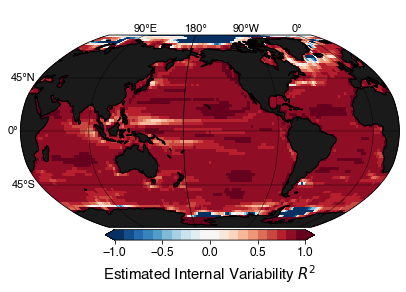

In [8]:
# Panel 1: R^2 of internal variability
R2_list = []
for Ite, PIte in zip(Ite_list, PIte_list):
    R2_list.append(metrics.R2(Ite, PIte, axis=(0,1,2)))
R2_map = np.mean(np.array(R2_list), axis=0)
colors = plt.cm.RdBu_r(np.linspace(0, 1, 19))
customcmap = plt.matplotlib.colors.ListedColormap(np.concatenate([colors[:10],colors[9:]], axis=0))
fig = plot.plot_map(R2_map[..., 0], lats, lons, vmin=-1, vmax=1, extend='both',
                    clabel='Estimated Internal Variability $R^{2}$', cmap=customcmap, coords=True);
fig.savefig(base_dirs['figures'] + 'performance_panel_1_R2_PIte.png', dpi=300, transparent=True, )
fig.show()

/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_44100/2393189998.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


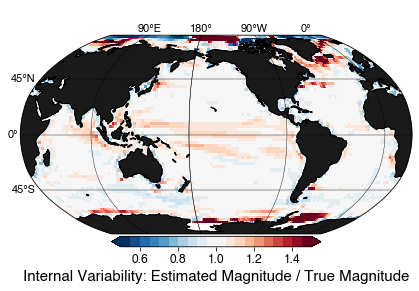

In [9]:
# Panel 2: Relative Magnitude of Predicted Internal Variability
def calc_proportional_IV(I, PI):
    IV = np.std(I, axis=(0,1,2))
    PIV = np.std(PI, axis=(0,1,2))
    return PIV/IV
imp.reload(plot)
IVscaled_list = []
for Ite, PIte in zip(Ite_list, PIte_list):
    IVscaled_list.append(calc_proportional_IV(Ite, PIte))
    
IVscaled_map = np.mean(np.array(IVscaled_list), axis=0)
colors = plt.cm.RdBu_r(np.linspace(0, 1, 19))
customcmap = plt.matplotlib.colors.ListedColormap(np.concatenate([colors[:10],colors[9:]], axis=0))
fig = plot.plot_map(IVscaled_map[..., 0], lats, lons, vmin=.5, vmax=1.5, extend='both',
                    clabel='Internal Variability: Estimated Magnitude / True Magnitude', cmap=customcmap, coords=True,);
fig.savefig(base_dirs['figures'] + 'performance_panel_1_IVscaled_PIte.png', dpi=300, transparent=True,)
fig.show()

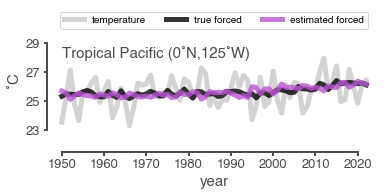

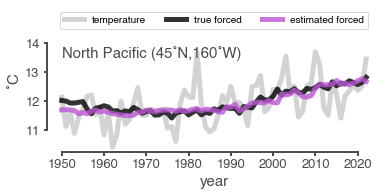

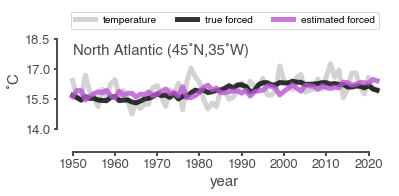

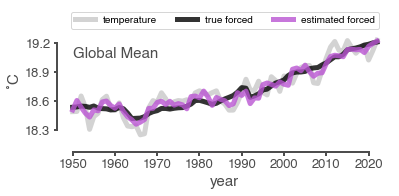

In [10]:
# Panels c-f
imp.reload(plot)

save_plots = True
leaveout = -1
mem = 4

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

end_year = 2022
yrs = np.arange(end_year - Ate_list[-1].shape[2], end_year) + 1
Aplot = Ate_list[leaveout][0,mem,...,0]
Fplot = Fte_list[leaveout][0,mem,...,0]
PFplot = PFte_list[leaveout][0,mem,...,0]

# 235E, 0N (ENSO)
laidx = find_nearest(lats, 0)
loidx = find_nearest(lons, 235)

fig = plot.plot_f_timeseries(yrs, Aplot[:, laidx, loidx], Fplot[:, laidx, loidx], PFplot[:, laidx, loidx],
                    title='Tropical Pacific (0˚N,125˚W)',
                    yticks=np.arange(23,30,2),
                    ylim = [21.5, 31.5],
                    texty=28
                    )
if save_plots:
    fig.savefig(base_dirs['figures'] + 'performance_panel_3_TropPacifc_timeseries.png', dpi=300, transparent=True)

# 200E, 45N (PDO)
laidx = find_nearest(lats, 45)
loidx = find_nearest(lons, 200)

fig = plot.plot_f_timeseries(yrs, Aplot[:, laidx, loidx], Fplot[:, laidx, loidx], PFplot[:, laidx, loidx],
                    title='North Pacific (45˚N,160˚W)',
                    yticks=np.arange(11,15,1),
                    ylim = [10.25, 15.25],
                    texty=13.5
                    )
if save_plots:
    fig.savefig(base_dirs['figures'] + 'performance_panel_4_NorthPacifc_timeseries.png', dpi=300, transparent=True)

# 315E, 45N (AMV)
laidx = find_nearest(lats, 45)
loidx = find_nearest(lons, 325)

fig = plot.plot_f_timeseries(yrs, Aplot[:, laidx, loidx], Fplot[:, laidx, loidx], PFplot[:, laidx, loidx],
                    title='North Atlantic (45˚N,35˚W)',
                    yticks=np.arange(14,20,1.5),
                    ylim = [14-.75*1.5, 19+.75*1.5],
                    texty=17.75
                    )
if save_plots:
    fig.savefig(base_dirs['figures'] + 'performance_panel_5_NorthAtlantic_timeseries.png', dpi=300, transparent=True)

Aplot = metrics.weighted_mean(Aplot, lats, lat_axis=-2, axis=(1,2))
Fplot = metrics.weighted_mean(Fplot, lats, lat_axis=-2, axis=(1,2))
PFplot = metrics.weighted_mean(PFplot, lats, lat_axis=-2, axis=(1,2))

fig = plot.plot_f_timeseries(yrs, Aplot, Fplot, PFplot,
                    title='Global Mean',
                    yticks=[18.3, 18.6, 18.9, 19.2,],
                    ylim = [18.3 - .75*.3, 19.2 + 1.25*.3],
                    texty=19.2 - .5 *.3,
                    )
if save_plots:
    fig.savefig(base_dirs['figures'] + 'performance_panel_6_GlobalMean_timeseries.png', dpi=300, transparent=True)

### Figure S1 (Mean across 10 seeds versus single seed performance)

In [11]:
wR2_list = []
wMAE_list = []
gMAE_list = []
gE_list = []

for BASE in BASE_EXPERIMENTS:
    EXPERIMENTS = [BASE + '_seed' + str(iseed) for iseed in range(10)]

    wR2_leavelist = []
    wMAE_leavelist = []
    gMAE_leavelist = []
    gE_leavelist = []

    for EXP in EXPERIMENTS:
        # Open the neural network
        __, settings_list = load_model(EXP, base_dirs)
        this_settings = settings_list[0]
        wR2_leavelist.append(this_settings['exp_results']['wR2_Ite'])
        wMAE_leavelist.append(this_settings['exp_results']['wMAE_Ite'])
        gMAE_leavelist.append(this_settings['exp_results']['gMAE_Ite'])
        gE_leavelist.append(this_settings['exp_results']['gE_Ite'])
    wR2_list.append(wR2_leavelist)
    wMAE_list.append(wMAE_leavelist)
    gMAE_list.append(gMAE_leavelist)
    gE_list.append(gE_leavelist)

wR2_list = np.array(wR2_list)
wMAE_list = np.array(wMAE_list)
gMAE_list = np.array(gMAE_list)
gE_list = np.array(gE_list)

saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_metadata.json
saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_model


saved_models/main_leave0_seed1/2024-07-11_0236//main_leave0_seed1_seed1_metadata.json
saved_models/main_leave0_seed1/2024-07-11_0236//main_leave0_seed1_seed1_model


saved_models/main_leave0_seed2/2024-07-11_0236//main_leave0_seed2_seed2_metadata.json
saved_models/main_leave0_seed2/2024-07-11_0236//main_leave0_seed2_seed2_model


saved_models/main_leave0_seed3/2024-07-11_0236//main_leave0_seed3_seed3_metadata.json
saved_models/main_leave0_seed3/2024-07-11_0236//main_leave0_seed3_seed3_model


saved_models/main_leave0_seed4/2024-07-11_0236//main_leave0_seed4_seed4_metadata.json
saved_models/main_leave0_seed4/2024-07-11_0236//main_leave0_seed4_seed4_model


saved_models/main_leave0_seed5/2024-07-11_0236//main_leave0_seed5_seed5_metadata.json
saved_models/main_leave0_seed5/2024-07-11_0236//main_leave0_seed5_seed5_model


saved_models/main_leave0_seed6/2024-07-11_0236//main_leave0_seed6_seed6_metadata.json
saved_models/main_leave0_seed6/2024-07-11_0236//main_leave0_seed6_seed6_model


saved_models/main_leave0_seed7/2024-07-11_0236//main_leave0_seed7_seed7_metadata.json
saved_models/main_leave0_seed7/2024-07-11_0236//main_leave0_seed7_seed7_model


saved_models/main_leave0_seed8/2024-07-11_0236//main_leave0_seed8_seed8_metadata.json
saved_models/main_leave0_seed8/2024-07-11_0236//main_leave0_seed8_seed8_model


saved_models/main_leave0_seed9/2024-07-11_0236//main_leave0_seed9_seed9_metadata.json
saved_models/main_leave0_seed9/2024-07-11_0236//main_leave0_seed9_seed9_model


saved_models/main_leave1_seed0/2024-07-11_0236//main_leave1_seed0_seed0_metadata.json
saved_models/main_leave1_seed0/2024-07-11_0236//main_leave1_seed0_seed0_model


saved_models/main_leave1_seed1/2024-07-11_0236//main_leave1_seed1_seed1_metadata.json
saved_models/main_leave1_seed1/2024-07-11_0236//main_leave1_seed1_seed1_model


saved_models/main_leave1_seed2/2024-07-11_0236//main_leave1_seed2_seed2_metadata.json
saved_models/main_leave1_seed2/2024-07-11_0236//main_leave1_seed2_seed2_model


saved_models/main_leave1_seed3/2024-07-11_0236//main_leave1_seed3_seed3_metadata.json
saved_models/main_leave1_seed3/2024-07-11_0236//main_leave1_seed3_seed3_model


saved_models/main_leave1_seed4/2024-07-11_0236//main_leave1_seed4_seed4_metadata.json
saved_models/main_leave1_seed4/2024-07-11_0236//main_leave1_seed4_seed4_model


saved_models/main_leave1_seed5/2024-07-11_0236//main_leave1_seed5_seed5_metadata.json
saved_models/main_leave1_seed5/2024-07-11_0236//main_leave1_seed5_seed5_model


saved_models/main_leave1_seed6/2024-07-11_0236//main_leave1_seed6_seed6_metadata.json
saved_models/main_leave1_seed6/2024-07-11_0236//main_leave1_seed6_seed6_model


saved_models/main_leave1_seed7/2024-07-11_0236//main_leave1_seed7_seed7_metadata.json
saved_models/main_leave1_seed7/2024-07-11_0236//main_leave1_seed7_seed7_model


saved_models/main_leave1_seed8/2024-07-11_0236//main_leave1_seed8_seed8_metadata.json
saved_models/main_leave1_seed8/2024-07-11_0236//main_leave1_seed8_seed8_model


saved_models/main_leave1_seed9/2024-07-11_0236//main_leave1_seed9_seed9_metadata.json
saved_models/main_leave1_seed9/2024-07-11_0236//main_leave1_seed9_seed9_model


saved_models/main_leave2_seed0/2024-07-11_0236//main_leave2_seed0_seed0_metadata.json
saved_models/main_leave2_seed0/2024-07-11_0236//main_leave2_seed0_seed0_model


saved_models/main_leave2_seed1/2024-07-11_0236//main_leave2_seed1_seed1_metadata.json
saved_models/main_leave2_seed1/2024-07-11_0236//main_leave2_seed1_seed1_model


saved_models/main_leave2_seed2/2024-07-11_0236//main_leave2_seed2_seed2_metadata.json
saved_models/main_leave2_seed2/2024-07-11_0236//main_leave2_seed2_seed2_model


saved_models/main_leave2_seed3/2024-07-11_0236//main_leave2_seed3_seed3_metadata.json
saved_models/main_leave2_seed3/2024-07-11_0236//main_leave2_seed3_seed3_model


saved_models/main_leave2_seed4/2024-07-11_0236//main_leave2_seed4_seed4_metadata.json
saved_models/main_leave2_seed4/2024-07-11_0236//main_leave2_seed4_seed4_model


saved_models/main_leave2_seed5/2024-07-11_0236//main_leave2_seed5_seed5_metadata.json
saved_models/main_leave2_seed5/2024-07-11_0236//main_leave2_seed5_seed5_model


saved_models/main_leave2_seed6/2024-07-11_0236//main_leave2_seed6_seed6_metadata.json
saved_models/main_leave2_seed6/2024-07-11_0236//main_leave2_seed6_seed6_model


saved_models/main_leave2_seed7/2024-07-11_0236//main_leave2_seed7_seed7_metadata.json
saved_models/main_leave2_seed7/2024-07-11_0236//main_leave2_seed7_seed7_model


saved_models/main_leave2_seed8/2024-07-11_0236//main_leave2_seed8_seed8_metadata.json
saved_models/main_leave2_seed8/2024-07-11_0236//main_leave2_seed8_seed8_model


saved_models/main_leave2_seed9/2024-07-11_0236//main_leave2_seed9_seed9_metadata.json
saved_models/main_leave2_seed9/2024-07-11_0236//main_leave2_seed9_seed9_model


saved_models/main_leave3_seed0/2024-07-11_0236//main_leave3_seed0_seed0_metadata.json
saved_models/main_leave3_seed0/2024-07-11_0236//main_leave3_seed0_seed0_model


saved_models/main_leave3_seed1/2024-07-11_0236//main_leave3_seed1_seed1_metadata.json
saved_models/main_leave3_seed1/2024-07-11_0236//main_leave3_seed1_seed1_model


saved_models/main_leave3_seed2/2024-07-11_0236//main_leave3_seed2_seed2_metadata.json
saved_models/main_leave3_seed2/2024-07-11_0236//main_leave3_seed2_seed2_model


saved_models/main_leave3_seed3/2024-07-11_0236//main_leave3_seed3_seed3_metadata.json
saved_models/main_leave3_seed3/2024-07-11_0236//main_leave3_seed3_seed3_model


saved_models/main_leave3_seed4/2024-07-11_0236//main_leave3_seed4_seed4_metadata.json
saved_models/main_leave3_seed4/2024-07-11_0236//main_leave3_seed4_seed4_model


saved_models/main_leave3_seed5/2024-07-11_0236//main_leave3_seed5_seed5_metadata.json
saved_models/main_leave3_seed5/2024-07-11_0236//main_leave3_seed5_seed5_model


saved_models/main_leave3_seed6/2024-07-11_0236//main_leave3_seed6_seed6_metadata.json
saved_models/main_leave3_seed6/2024-07-11_0236//main_leave3_seed6_seed6_model


saved_models/main_leave3_seed7/2024-07-11_0236//main_leave3_seed7_seed7_metadata.json
saved_models/main_leave3_seed7/2024-07-11_0236//main_leave3_seed7_seed7_model


saved_models/main_leave3_seed8/2024-07-11_0236//main_leave3_seed8_seed8_metadata.json
saved_models/main_leave3_seed8/2024-07-11_0236//main_leave3_seed8_seed8_model


saved_models/main_leave3_seed9/2024-07-11_0236//main_leave3_seed9_seed9_metadata.json
saved_models/main_leave3_seed9/2024-07-11_0236//main_leave3_seed9_seed9_model


saved_models/main_leave4_seed0/2024-07-11_0236//main_leave4_seed0_seed0_metadata.json
saved_models/main_leave4_seed0/2024-07-11_0236//main_leave4_seed0_seed0_model


saved_models/main_leave4_seed1/2024-07-11_0236//main_leave4_seed1_seed1_metadata.json
saved_models/main_leave4_seed1/2024-07-11_0236//main_leave4_seed1_seed1_model


saved_models/main_leave4_seed2/2024-07-11_0236//main_leave4_seed2_seed2_metadata.json
saved_models/main_leave4_seed2/2024-07-11_0236//main_leave4_seed2_seed2_model


saved_models/main_leave4_seed3/2024-07-11_0236//main_leave4_seed3_seed3_metadata.json
saved_models/main_leave4_seed3/2024-07-11_0236//main_leave4_seed3_seed3_model


saved_models/main_leave4_seed4/2024-07-11_0236//main_leave4_seed4_seed4_metadata.json
saved_models/main_leave4_seed4/2024-07-11_0236//main_leave4_seed4_seed4_model


saved_models/main_leave4_seed5/2024-07-11_0236//main_leave4_seed5_seed5_metadata.json
saved_models/main_leave4_seed5/2024-07-11_0236//main_leave4_seed5_seed5_model


saved_models/main_leave4_seed6/2024-07-11_0236//main_leave4_seed6_seed6_metadata.json
saved_models/main_leave4_seed6/2024-07-11_0236//main_leave4_seed6_seed6_model


saved_models/main_leave4_seed7/2024-07-11_0236//main_leave4_seed7_seed7_metadata.json
saved_models/main_leave4_seed7/2024-07-11_0236//main_leave4_seed7_seed7_model


saved_models/main_leave4_seed8/2024-07-11_0236//main_leave4_seed8_seed8_metadata.json
saved_models/main_leave4_seed8/2024-07-11_0236//main_leave4_seed8_seed8_model


saved_models/main_leave4_seed9/2024-07-11_0236//main_leave4_seed9_seed9_metadata.json
saved_models/main_leave4_seed9/2024-07-11_0236//main_leave4_seed9_seed9_model


In [12]:
wR2_allseeds = []
wMAE_allseeds = []
gMAE_allseeds = []

for thisPIte, thisIte in zip(PIte_list, Ite_list):

    wR2_allseeds.append(metrics.R2(thisIte, thisPIte, weighted=True, lats=lats))
    wMAE_allseeds.append(metrics.MAE(thisIte, thisPIte, weighted=True, lats=lats))
    gMAE_allseeds.append(metrics.globalMAE(thisIte, thisPIte, lats))

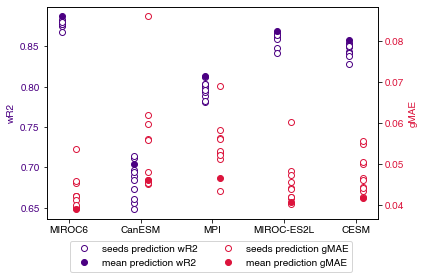

In [14]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

ax1.plot(np.arange(5)-.1, wR2_list, 'o', color='indigo', markerfacecolor='white',)
ax1.plot([np.nan], [np.nan], 'o', color='indigo', markerfacecolor='white', label='seeds prediction wR2')
ax1.plot(np.arange(5)-.1, wR2_allseeds, 'o', color='indigo', label = 'mean prediction wR2')
ax1.set_ylabel('wR2', color = 'indigo') 
ax1.tick_params(axis ='y', labelcolor = 'indigo') 

ax2.plot([np.nan], [np.nan], 'o', color='indigo', markerfacecolor='white', label='seeds prediction wR2')
ax2.plot([np.nan], [np.nan], 'o', color='indigo', label = 'mean prediction wR2')
ax2.plot(np.arange(5)+.1, gMAE_list, 'o', color='crimson', markerfacecolor='white',)
ax2.plot([np.nan], [np.nan], 'o', color='crimson', markerfacecolor='white',label='seeds prediction gMAE')
ax2.plot(np.arange(5)+.1, gMAE_allseeds, 'o', color='crimson', label = 'mean prediction gMAE')
ax2.set_ylabel('gMAE', color = 'crimson') 
ax2.tick_params(axis ='y', labelcolor = 'crimson') 

plt.xticks(np.arange(5), ['MIROC6', 'CanESM', 'MPI', 'MIROC-ES2L', 'CESM']);
ax2.legend(loc = [.07,-.25], ncol=2)

plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'S1_performance_meanseeds_v_indvseeds.png', dpi=300, transparent=True,)

### Figure S2

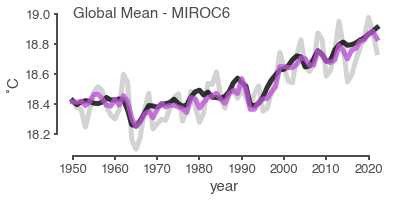

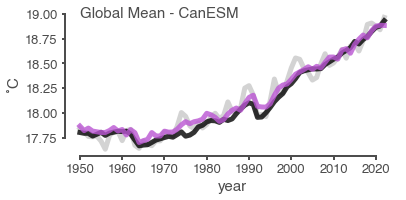

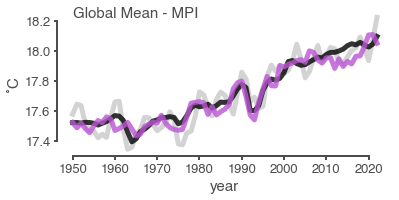

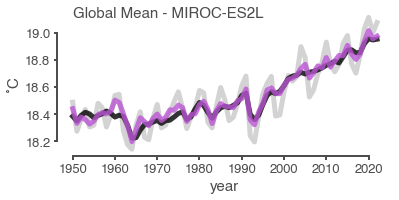

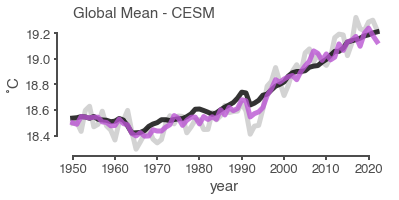

In [17]:
save_plots = True
for leaveout,modelname in zip([0,1,2,3,4], ['MIROC6', 'CanESM', 'MPI', 'MIROC-ES2L', 'CESM']):

    mem = 0

    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx

    end_year = 2022
    yrs = np.arange(end_year - Ate_list[-1].shape[2], end_year) + 1
    Aplot = Ate_list[leaveout][0,mem,...,0]
    Fplot = Fte_list[leaveout][0,mem,...,0]
    PFplot = PFte_list[leaveout][0,mem,...,0]

    Aplot = metrics.weighted_mean(Aplot, lats, lat_axis=-2, axis=(1,2))
    Fplot = metrics.weighted_mean(Fplot, lats, lat_axis=-2, axis=(1,2))
    PFplot = metrics.weighted_mean(PFplot, lats, lat_axis=-2, axis=(1,2))

    fig = plot.plot_f_timeseries(yrs, Aplot, Fplot, PFplot,
                        title='Global Mean - ' + modelname, legend=False
                        )
    if save_plots:
        fig.savefig(base_dirs['suppfigures'] + 'S2_' + modelname + 'global.png', dpi=300, transparent=True)

### Figure S8 (Comparison with a fourth-order polynomial fit)

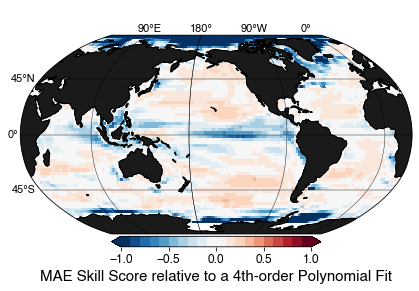

In [19]:
# Supp Figure: Comparison with a 4th order polynomial fit
LFte_list = []
deg = 4
for Ate in Ate_list:
    LFte_list.append(data_methods.polyfit_prediction(Ate[...,0:1], deg=deg))
    
MAESS_list = []
for PFte, Fte, LFte in zip(PFte_list, Fte_list, LFte_list):

    Fpred = PFte
    Ftrue = Fte
    Fcomp = LFte
    MAESS_list.append( (1 - np.abs(Fpred - Ftrue).mean(axis=(0,1,2)) / np.abs(Fcomp - Ftrue).mean(axis=(0,1,2))) )

MAESS = np.mean(MAESS_list, axis=0)

colors = plt.cm.RdBu_r(np.linspace(0, 1, 19))
customcmap = plt.matplotlib.colors.ListedColormap(np.concatenate([colors[:10],colors[9:]], axis=0))
fig = plot.plot_map(MAESS[..., 0], lats, lons, vmin=-1, vmax=1, extend='both',
                    clabel='MAE Skill Score relative to a 4th-order Polynomial Fit', cmap=customcmap, coords=True,);
fig.savefig(base_dirs['suppfigures'] + 'S6_performance_rel_4degpolyfit.png', dpi=300, transparent=True,)
plt.show()

## Figure 4 - observations + 2023

In [3]:
EXPERIMENTS = ["final_seed0", "final_seed1","final_seed2","final_seed3","final_seed4",
               "final_seed5","final_seed6","final_seed7","final_seed8","final_seed9",]
base_dirs = directories.get_dirs()
PIob_list = []
PFob_list = []
for EXP in EXPERIMENTS:
    # Open the neural network
    model_list, settings_list = load_model(EXP, base_dirs)
    this_model = model_list[0]
    this_settings = settings_list[0]
    network_methods.compile_CVED(this_model, this_settings)
    # Prepare the data
    Atr, Ava, Ate, Aob, Ftr, Fva, Fte, Itr, Iva, Ite, \
        Xtr, Xva, Xte, Xob, Xshapes, Ttr, Tva, Tte, Tshapes, \
        Tmean, Tstd, lats, lons, M = data_methods.prepare_data(this_settings, base_dirs)

    # Predictions for observations
    Pob = this_model.predict(Xob)
    _ = gc.collect()
    PIob = data_methods.unstandardize_predictions(Pob, Tmean, Tstd, Aob.shape, M)
    PFob = Aob[..., 0:1] - PIob

    PIob_list.append(PIob)
    PFob_list.append(PFob)

PIob = np.mean(PIob_list, axis=0)
PFob = np.mean(PFob_list, axis=0)


saved_models/final_seed0/2024-07-11_0154//final_seed0_seed0_metadata.json
saved_models/final_seed0/2024-07-11_0154//final_seed0_seed0_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 151ms/step
saved_models/final_seed1/2024-07-11_0207//final_seed1_seed1_metadata.json
saved_models/final_seed1/2024-07-11_0207//final_seed1_seed1_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 150ms/step
saved_models/final_seed2/2024-07-11_0207//final_seed2_seed2_metadata.json
saved_models/final_seed2/2024-07-11_0207//final_seed2_seed2_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 147ms/step
saved_models/final_seed3/2024-07-11_0236//final_seed3_seed3_metadata.json
saved_models/final_seed3/2024-07-11_0236//final_seed3_seed3_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 142ms/step
saved_models/final_seed4/2024-07-11_0236//final_seed4_seed4_metadata.json
saved_models/final_seed4/2024-07-11_0236//final_seed4_seed4_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 139ms/step
saved_models/final_seed5/2024-07-11_0236//final_seed5_seed5_metadata.json
saved_models/final_seed5/2024-07-11_0236//final_seed5_seed5_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 157ms/step
saved_models/final_seed6/2024-07-11_0236//final_seed6_seed6_metadata.json
saved_models/final_seed6/2024-07-11_0236//final_seed6_seed6_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 143ms/step
saved_models/final_seed7/2024-07-11_0236//final_seed7_seed7_metadata.json
saved_models/final_seed7/2024-07-11_0236//final_seed7_seed7_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 150ms/step
saved_models/final_seed8/2024-07-11_0236//final_seed8_seed8_metadata.json
saved_models/final_seed8/2024-07-11_0236//final_seed8_seed8_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 140ms/step
saved_models/final_seed9/2024-07-11_0236//final_seed9_seed9_metadata.json
saved_models/final_seed9/2024-07-11_0236//final_seed9_seed9_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:483: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


3/3 [==============================] - 1s 143ms/step


Output to a NetCDF file

In [5]:
# Save to a NetCDF
from netCDF4 import Dataset

end_year = 2023
yrs = np.arange(end_year - Aob.shape[2], end_year) + 1

# Create a NetCDF file
with Dataset(base_dirs['attribution_estimate'] + 'sst_attribution.nc', 'w', format='NETCDF4') as ds:
    # Create dimensions
    ds.createDimension('lat', len(lats))
    ds.createDimension('lon', len(lons))
    ds.createDimension('time', len(yrs))

    # Create variables
    lat_var = ds.createVariable('lat', 'f4', ('lat',))
    lon_var = ds.createVariable('lon', 'f4', ('lon',))
    time_var = ds.createVariable('time', 'f4', ('time',))
    data_var1 = ds.createVariable('sst_internal', 'f4', ('time', 'lat', 'lon',))
    data_var2 = ds.createVariable('sst_forced', 'f4', ('time', 'lat', 'lon',))

    # Add attributes
    lat_var.units = 'degrees_north'
    lon_var.units = 'degrees_east'
    time_var.units = 'year'
    data_var1.units = 'degrees C'
    data_var2.units = 'degrees C'

    # Write data to variables
    lat_var[:] = lats
    lon_var[:] = lons
    time_var[:] = yrs
    data_var1[:] = PIob.squeeze()
    data_var2[:] = PFob.squeeze()

    # Add some information
    ds.description = 'Internal and forced components of observed sea surface temperature (from ERSSTv5) based on neural network estimates.'
    ds.citation = 'Rader, J. K., Charlotte J. Connolly, M. A. Fernandez, and Emily M. Gordon, 2025: "Attribution of the record-high 2023 SST using a deep-learning framework." Environmental Research Communications.'

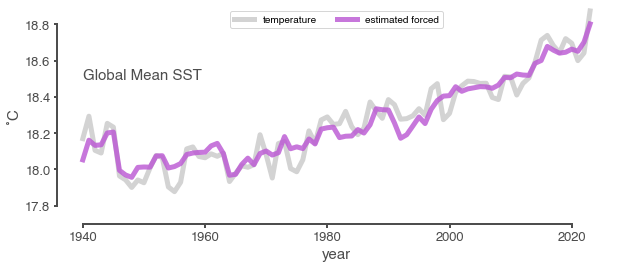

In [ ]:
# Panel 1: Global mean temperature change
imp.reload(plot)
end_year = 2023
yrs = np.arange(end_year - Aob.shape[2], end_year) + 1
Aplot = metrics.weighted_mean(Aob, lats, lat_axis=3, axis=(0,1,3,4,5))
PFplot = metrics.weighted_mean(PFob, lats, lat_axis=3, axis=(0,1,3,4,5))

fig = plot.plot_f_timeseries(yrs, Aplot, None, PFplot,
                    title='Global Mean SST',
                    textx=1940, texty = 18.5,
                    yticks = np.arange(17.8, 18.9, .2),
                    ylim = [17.7, 18.9], figsize=(10,4),)

#plt.axvline(1991)
fig.savefig(base_dirs['figures'] + 'observations_panel_1_GMSST.png', dpi=300, transparent=True)

In [77]:
# Calculating records relative to previous global-mean SST records
sorted_idxs = np.argsort(Aplot)
print(Aplot[sorted_idxs[-1]])
print(Aplot[sorted_idxs[-1]] - Aplot[sorted_idxs[-2]])
print(Aplot[sorted_idxs[-1]] - np.mean(Aplot[41:-13]))
maxgmsst = Aplot[-21]
records = 0
for gmsst in Aplot[-20:]:
    if gmsst > maxgmsst:
        records += 1
        maxgmsst = gmsst
print(records)
maxgmsst = 0
for gmsst in Aplot:
    if gmsst > maxgmsst:
        records += 1
        print('%.2f' % (gmsst - maxgmsst))
        maxgmsst = gmsst

18.87478276813708
0.1350355048577292
0.5146231205684906
5
18.17
0.12
0.03
0.05
0.01
0.06
0.03
0.01
0.03
0.08
0.12
0.03
0.14


/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_56273/4116371157.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


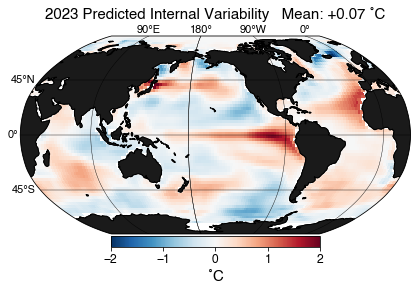

In [ ]:
plotyear = 2023
yidx = plotyear - 2024

# Panel 2: 2023 attribution to internal variability
net_IV = metrics.weighted_mean(PIob[0,0,yidx,:,:,0], lats, lat_axis=0)
net_IV_str = ('%.2f ˚C' % net_IV)
fig = plot.plot_map(PIob[0,0,yidx,:,:,0], lats, lons, vmin=-2, vmax=2, title=str(plotyear) + ' Predicted Internal Variability   Mean: +' + net_IV_str, clabel='˚C', coords=True,);
fig.savefig(base_dirs['figures'] + 'observations_panel_2_PIte.png', dpi=300, transparent=True)
fig.show()

2023
[[0.15080753 0.14134494 0.11573563 ... 0.         0.         0.        ]
 [0.14134494 0.15201683 0.14192553 ... 0.         0.         0.        ]
 [0.11573563 0.14192553 0.15019507 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


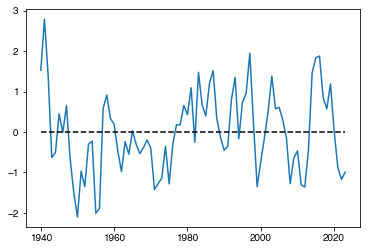

/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_56273/2799831898.py:94: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.pcolormesh(e1.reshape(PDOregion.shape[1], PDOregion.shape[2]).astype(float)*-1, cmap='bwr')


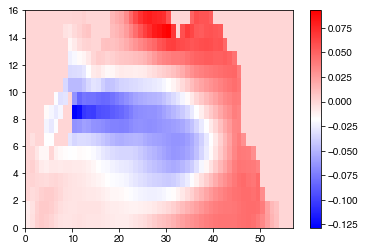

In [184]:
# Calculating climate indices
plotyear = 2023
yidx = plotyear - 2024
print(plotyear)

lats = np.array(lats)
lons = np.array(lons)
mlons, mlats = np.meshgrid(lons, lats)

## Climate indices
### Nino34  #5N-5S, 170W-120W
latargs = np.argwhere(np.logical_and(lats>=-5, lats<=5))
lonargs = np.argwhere(np.logical_and(lons>=360-170, lons<=360-120))
latargmin, latargmax, lonargmin, lonargmax = np.min(latargs), np.max(latargs), np.min(lonargs), np.max(lonargs)
Nino34 = metrics.weighted_mean(PIob[0,0,:,latargmin:latargmax+1,lonargmin:lonargmax+1,0], lats = lats[latargmin:latargmax+1], lat_axis=1, axis=(1,2))

### DMI   #western (10°S–10°N, 50°–70°E) minus eastern Indian Ocean (10°S–0°, 90°–110°E)
latargs = np.argwhere(np.logical_and(lats>=-10, lats<=10))
lonargs = np.argwhere(np.logical_and(lons>=50, lons<=70))
latargmin, latargmax, lonargmin, lonargmax = np.min(latargs), np.max(latargs), np.min(lonargs), np.max(lonargs)
IODw = metrics.weighted_mean(PIob[0,0,:,latargmin:latargmax+1,lonargmin:lonargmax+1,0], lats=lats[latargmin:latargmax+1], lat_axis=1, axis=(1,2))
latargs = np.argwhere(np.logical_and(lats>=-10, lats<=0))
lonargs = np.argwhere(np.logical_and(lons>=90, lons<=110))
latargmin, latargmax, lonargmin, lonargmax = np.min(latargs), np.max(latargs), np.min(lonargs), np.max(lonargs)
IODe = metrics.weighted_mean(PIob[0,0,:,latargmin:latargmax+1,lonargmin:lonargmax+1,0], lats=lats[latargmin:latargmax+1], lat_axis=1, axis=(1,2))
DMI = IODw-IODe

### PDO   first mode of variability for 20-70N over the North Pacific (see Trenberth and Fasullo (2013))
latargs = np.argwhere(np.logical_and(lats>=20, lats<=60))
lonargs = np.argwhere(np.logical_and(lons>=120, lons<=260))
latargmin, latargmax, lonargmin, lonargmax = np.min(latargs), np.max(latargs), np.min(lonargs), np.max(lonargs)
PDOregion = PIob[0,0,:,latargmin:latargmax+1,lonargmin:lonargmax+1,0]
PDOregion_flat = PDOregion.reshape(PDOregion.shape[0], -1)
PDOregion_flat[np.isnan(PDOregion_flat)] = 0

def nandot(X, Y):

    C = np.empty([np.size(X, axis=0), np.size(Y, axis=1)])
    for row in np.arange(0, np.size(X, axis=0)):
        for col in np.arange(0, np.size(Y, axis=1)):
            C[row, col] = np.nanmean(np.multiply(X[row, :], Y[:, col]))

    return C

C = nandot(np.transpose(PDOregion_flat), PDOregion_flat)
print(C)
# calculate eigenvalues and eigenvectors of C; lam should be 7x1, E should be 7x7
lam, E = np.linalg.eig(C)

# sort eigenvalues and vector by the largest to smallest eigenvalues
i = np.flipud(np.argsort(lam))
lam = lam[i]
E = E[:, i]

# convert eigenvalues to percent variance explained
pve = 100.0 * lam / np.sum(lam)

# plt.figure(figsize=(8, 5))
# plt.plot(np.arange(1, np.size(pve) + 1.0), pve, "o-", linewidth=2, color="black")

# plt.xlim(0.5, 7.5)
# plt.xlabel("eigenvalue position")
# plt.ylabel("percent variance explained (%)")

# plot error bars according to North et al.abs
# here we will assume that all of the data is independent (is that a good assumption?)
# such that Nstar = N
Nstar = np.size(PDOregion_flat, axis=0)
eb = pve * np.sqrt(2.0 / Nstar)
# plt.errorbar(
#     np.arange(1, np.size(pve) + 1.0),
#     pve,
#     yerr=eb,
#     xerr=None,
#     linewidth=1,
#     color="black",
# )

# plt.show()

# take only one eigenvector, user specified by "eof_num" above
e1 = E[:, 0]  # e1 should be 7x1 or 1x7 depending on your software

# calculate the the PC associated with the EOF of interest
z1 = np.dot(PDOregion_flat, e1)*-1
z1 = (z1 - np.nanmean(z1)) / np.nanstd(z1)

plt.plot(np.arange(1940, 2024), z1)
plt.plot([1940, 2023], [0,0], 'k--')
plt.show()

PDO = z1

plt.pcolormesh(e1.reshape(PDOregion.shape[1], PDOregion.shape[2]).astype(float)*-1, cmap='bwr')
plt.colorbar()
plt.show()

#A good example is the AMO, which is based on an index of area average SST over the North Atlantic from 0 to 60N (see Trenberth and Shea (2006))
AMOregion = PIob[0,0,:,:,:,0].copy()
AMOregion[:,lats>=60] = np.nan
AMOregion[:,lats<=0] = np.nan
AMOregion[...,np.logical_and(lons<=260, lons>15)] = np.nan
AMOregion[:,np.logical_and(mlats>50, np.logical_and(mlons<=290, mlons>=15))] = np.nan
AMOregion[:,np.logical_and(mlats<11, np.logical_and(mlons<=283, mlons>=15))] = np.nan
AMOregion[:,np.logical_and(mlats<15, np.logical_and(mlons<=275, mlons>=15))] = np.nan
AMOregion[:,np.logical_and(np.logical_and(mlats<45, mlats>15), mlons<=15)] = np.nan
AMOregion = AMOregion*M.squeeze()
AMO = metrics.weighted_mean(AMOregion, lats, lat_axis=1, axis=(1,2))

#### Climate indices, Figure S7

/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


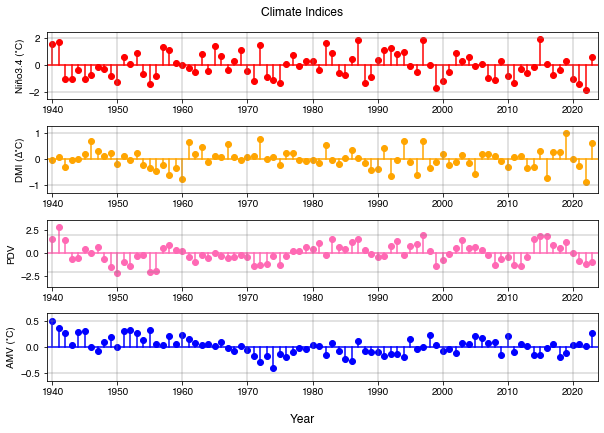

In [222]:
colorlist = ['red', 'orange','hotpink', 'blue',]
fig = plt.figure(figsize=(8.5,6))
iplot = 0
for T, regionname in zip([Nino34, DMI, PDO, AMO], 
                         ['Niño3.4 (˚C)', 'DMI (∆˚C)', 'PDV', 'AMV (˚C)',]):
    iplot+=1
    plotcolor = colorlist[iplot-1]
    for y,p in zip(np.arange(1940, 2024), T):
        ax = plt.subplot(4,1,iplot)
        plt.plot(y,p, 'o', color=plotcolor)
        plt.plot([y,y], [0,p], color=plotcolor)
        

    plt.axhline(0, color = plotcolor)
    yabsmax = np.max(np.abs(T))*1.3
    yticks = ax.get_yticks()
    plt.ylim(-yabsmax, yabsmax)
    plt.xlim(1939.2, 2023.8)
    # for i in np.arange(-.2,.21,.01):
    #     if i != 0:
    #         plt.axhline(i, alpha=.1, color='gray')
    for i in yticks:
        if i != 0:
            plt.axhline(i, alpha=.3, color='gray')
    

    plt.ylabel(regionname)

    for y in np.arange(1940,2025,10):
        plt.axvline(y, linestyle='-', alpha=.3, color='gray')

    plt.xticks(np.arange(1940,2025,10))
    plt.tight_layout()

fig.suptitle('Climate Indices')
fig.supxlabel('Year')
plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'timeseries_climate_indices.png', dpi=300, transparent=True)

2015


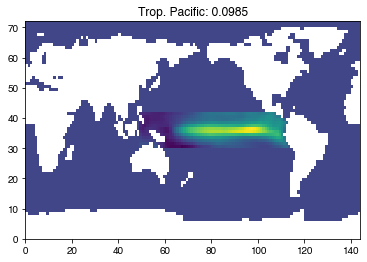

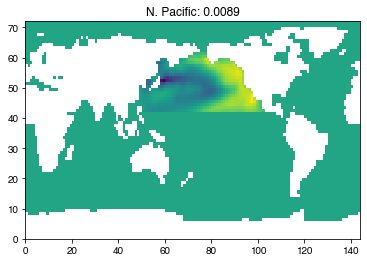

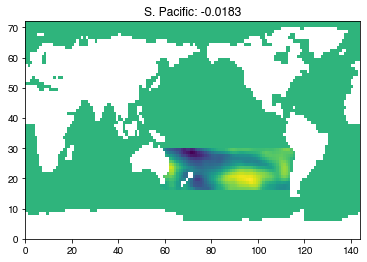

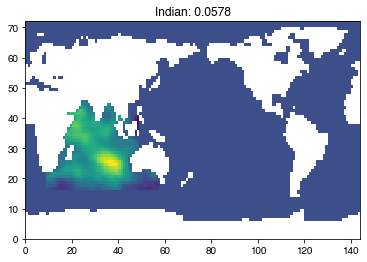

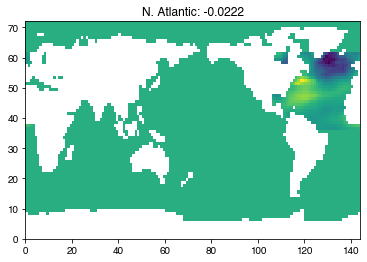

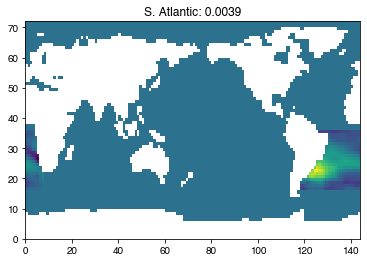

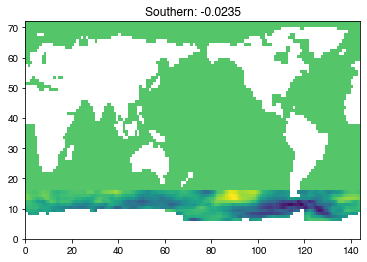

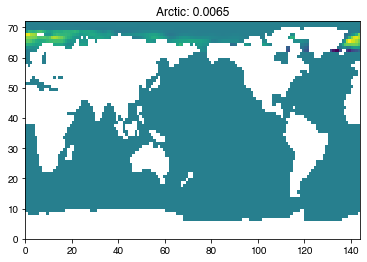

In [225]:
# Calculating regional contributions to global-annual-mean SST

plotyear = 2015
T_TropPac = []
T_NorPac = []
T_SouPac = []
T_NorAtl = []
T_SouAtl = []
T_Indian = []
T_Southern = []
T_Arctic = []

for year in range(1940, 2024):

    yidx = year - 2024


    lats = np.array(lats)
    lons = np.array(lons)
    mlons, mlats = np.meshgrid(lons, lats)

    # Tropical Pacific
    PIob_TropPac = PIob[0,0,yidx,:,:,0].copy()
    PIob_TropPac[np.logical_or(lats<=-15, lats>=15)] = 0
    PIob_TropPac[:,np.logical_or(lons<=120, lons>=284)] = 0
    PIob_TropPac[np.logical_and(mlats>=9, mlons>=277)] = 0
    PIob_TropPac = PIob_TropPac*M.squeeze()
    yrT_TropPac = metrics.weighted_mean(PIob_TropPac, lats, lat_axis=0)
    T_TropPac.append(yrT_TropPac)
    if year == plotyear:
        print(plotyear)
        plt.pcolormesh(PIob_TropPac)
        plt.title('Trop. Pacific: %.04f' % yrT_TropPac)
        plt.show()

    

    # North Pacific
    PIob_NorPac = PIob[0,0,yidx,:,:,0].copy()
    PIob_NorPac[lats<=15] = 0
    PIob_NorPac[lats>65] = 0
    PIob_NorPac[:,np.logical_or(lons<=120, lons>=260)] = 0
    PIob_NorPac = PIob_NorPac*M.squeeze()
    yrT_NorPac = metrics.weighted_mean(PIob_NorPac, lats, lat_axis=0)
    T_NorPac.append(yrT_NorPac)

    if year == plotyear:
        plt.pcolormesh(PIob_NorPac)
        plt.title('N. Pacific: %.04f' % yrT_NorPac)
        plt.show()


    # South Pacific
    PIob_SouPac = PIob[0,0,yidx,:,:,0].copy()
    PIob_SouPac[lats>=-15] = 0
    PIob_SouPac[lats<=-50] = 0
    PIob_SouPac[:,np.logical_or(lons<=143, lons>=290)] = 0
    PIob_SouPac = PIob_SouPac*M.squeeze()
    yrT_SouPac = metrics.weighted_mean(PIob_SouPac, lats, lat_axis=0)
    T_SouPac.append(yrT_SouPac)

    if year == plotyear:
        plt.pcolormesh(PIob_SouPac)
        plt.title('S. Pacific: %.04f' % yrT_SouPac)
        plt.show()

    # Indian Ocean
    PIob_Indian = PIob[0,0,yidx,:,:,0].copy()
    PIob_Indian[lats>=50] = 0
    PIob_Indian[lats<=-50] = 0
    PIob_Indian[:,np.logical_or(lons<=20, lons>=143)] = 0
    PIob_Indian[np.logical_and(mlats>30, mlons<=40)] = 0
    PIob_Indian[np.logical_and(mlats>-15, mlons>120)] = 0
    PIob_Indian = PIob_Indian*M.squeeze()
    yrT_Indian = metrics.weighted_mean(PIob_Indian, lats, lat_axis=0)
    T_Indian.append(yrT_Indian)

    if year == plotyear:
        plt.pcolormesh(PIob_Indian)
        plt.title('Indian: %.04f' % yrT_Indian)
        plt.show()

    # North Atlantic
    PIob_NorAtl = PIob[0,0,yidx,:,:,0].copy()
    PIob_NorAtl[lats>=65] = 0
    PIob_NorAtl[lats<=0] = 0
    PIob_NorAtl[:,np.logical_and(lons<=260, lons>15)] = 0
    PIob_NorAtl[np.logical_and(mlats>50, np.logical_and(mlons<=260, mlons>=15))] = 0
    PIob_NorAtl[np.logical_and(mlats<11, np.logical_and(mlons<=283, mlons>=15))] = 0
    PIob_NorAtl[np.logical_and(mlats<15, np.logical_and(mlons<=275, mlons>=15))] = 0
    PIob_NorAtl[np.logical_and(np.logical_and(mlats<45, mlats>15), mlons<=15)] = 0
    PIob_NorAtl = PIob_NorAtl*M.squeeze()
    yrT_NorAtl = metrics.weighted_mean(PIob_NorAtl, lats, lat_axis=0)
    T_NorAtl.append(yrT_NorAtl)

    if year == plotyear:
        plt.pcolormesh(PIob_NorAtl)
        plt.title('N. Atlantic: %.04f' % yrT_NorAtl)
        plt.show()

    # South Atlantic
    PIob_SouAtl = PIob[0,0,yidx,:,:,0].copy()
    PIob_SouAtl[lats>=0] = 0
    PIob_SouAtl[lats<=-50] = 0
    PIob_SouAtl[:,np.logical_and(lons>=20, lons<=290)] = 0
    PIob_SouAtl = PIob_SouAtl*M.squeeze()
    yrT_SouAtl = metrics.weighted_mean(PIob_SouAtl, lats, lat_axis=0)
    T_SouAtl.append(yrT_SouAtl)

    if year == plotyear:
        plt.pcolormesh(PIob_SouAtl)
        plt.title('S. Atlantic: %.04f' % yrT_SouAtl)
        plt.show()

    # Southern Ocean
    PIob_Southern = PIob[0,0,yidx,:,:,0].copy()
    PIob_Southern[lats>=-50] = 0
    PIob_Southern = PIob_Southern*M.squeeze()
    yrT_Southern = metrics.weighted_mean(PIob_Southern, lats, lat_axis=0)
    T_Southern.append(yrT_Southern)

    if year == plotyear:
        plt.pcolormesh(PIob_Southern)
        plt.title('Southern: %.04f' % yrT_Southern)
        plt.show()

    # Arctic Ocean
    PIob_Arctic = PIob[0,0,yidx,:,:,0].copy()
    PIob_Arctic[lats<=65] = 0
    PIob_Arctic = PIob_Arctic*M.squeeze()
    yrT_Arctic = metrics.weighted_mean(PIob_Arctic, lats, lat_axis=0)
    T_Arctic.append(yrT_Arctic)

    if year == plotyear:
        plt.pcolormesh(PIob_Arctic)
        plt.title('Arctic: %.04f' % yrT_Arctic)
        plt.show()

#### Timeseries of basin contributions, Figure S6

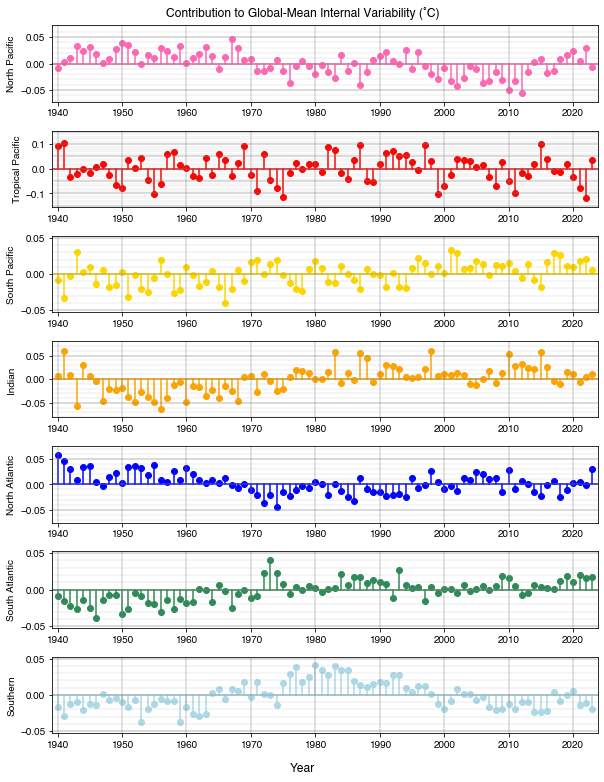

In [224]:
colorlist = ['hotpink', 'red', 'gold', 'orange', 'blue', 'seagreen', 'lightblue']
fig = plt.figure(figsize=(8.5,11))
iplot = 0
for T, regionname in zip([T_NorPac, T_TropPac, T_SouPac, T_Indian, T_NorAtl, T_SouAtl, T_Southern], 
                         ['North Pacific', 'Tropical Pacific', 'South Pacific', 'Indian', 'North Atlantic', 'South Atlantic', 'Southern']):
    iplot+=1
    plotcolor = colorlist[iplot-1]
    for y,p in zip(np.arange(1940, 2024), T):
        plt.subplot(7,1,iplot)
        plt.plot(y,p, 'o', color=plotcolor)
        plt.plot([y,y], [0,p], color=plotcolor)
        

    plt.axhline(0, color = plotcolor)
    yabsmax = np.max(np.abs(T))*1.3
    plt.ylim(-yabsmax, yabsmax)
    plt.xlim(1939.2, 2023.8)
    for i in np.arange(-.2,.21,.01):
        if i != 0:
            plt.axhline(i, alpha=.1, color='gray')
    for i in np.arange(-.2,.25, .05):
        if i != 0:
            plt.axhline(i, alpha=.3, color='gray')
    
    plt.ylabel(regionname)

    for y in np.arange(1940,2025,10):
        plt.axvline(y, linestyle='-', alpha=.3, color='gray')

    plt.xticks(np.arange(1940,2025,10))
fig.suptitle('Contribution to Global-Mean Internal Variability (˚C)')
fig.supxlabel('Year')
plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'timeseries_contributions_to_IV.png', dpi=300, transparent=True)

/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_44100/788553287.py:88: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


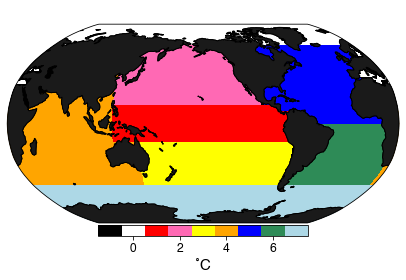

In [30]:
val=1
# Tropical Pacific
PIob_TropPac = np.zeros_like(PIob[0,0,0,:,:,0])
PIob_TropPac = PIob_TropPac+val
PIob_TropPac[np.logical_or(lats<=-15, lats>=15)] = 0
PIob_TropPac[:,np.logical_or(lons<=120, lons>=284)] = 0
PIob_TropPac[np.logical_and(mlats>=9, mlons>=277)] = 0
#PIob_TropPac = PIob_TropPac*M.squeeze()

val=2
# North Pacific
PIob_NorPac = np.zeros_like(PIob[0,0,0,:,:,0])
PIob_NorPac = PIob_NorPac + val
PIob_NorPac[lats<=15] = 0
PIob_NorPac[lats>65] = 0
PIob_NorPac[:,np.logical_or(lons<=120, lons>=260)] = 0
#PIob_NorPac = PIob_NorPac*M.squeeze()


val=3
# South Pacific
PIob_SouPac = np.zeros_like(PIob[0,0,0,:,:,0])
PIob_SouPac = PIob_SouPac + val
PIob_SouPac[lats>=-15] = 0
PIob_SouPac[lats<=-50] = 0
PIob_SouPac[:,np.logical_or(lons<=143, lons>=290)] = 0
#PIob_SouPac = PIob_SouPac*M.squeeze()


val=4
# Indian Ocean
PIob_Indian = np.zeros_like(PIob[0,0,0,:,:,0])
PIob_Indian = PIob_Indian + val
PIob_Indian[lats>=50] = 0
PIob_Indian[lats<=-50] = 0
PIob_Indian[:,np.logical_or(lons<=20, lons>=143)] = 0
PIob_Indian[np.logical_and(mlats>30, mlons<=40)] = 0
PIob_Indian[np.logical_and(mlats>-15, mlons>120)] = 0
# To fix NaN regions
PIob_Indian[np.logical_and(mlats>12, mlons<43)] = 0
PIob_Indian[np.logical_and(mlats>24, mlons<56)] = 0



val=5
# North Atlantic
PIob_NorAtl = np.zeros_like(PIob[0,0,0,:,:,0])
PIob_NorAtl = PIob_NorAtl + val
PIob_NorAtl[lats>=65] = 0
PIob_NorAtl[lats<=0] = 0
PIob_NorAtl[:,np.logical_and(lons<=260, lons>15)] = 0
PIob_NorAtl[np.logical_and(mlats>50, np.logical_and(mlons<=260, mlons>=15))] = 0
PIob_NorAtl[np.logical_and(mlats<11, np.logical_and(mlons<=283, mlons>=15))] = 0
PIob_NorAtl[np.logical_and(mlats<15, np.logical_and(mlons<=275, mlons>=15))] = 0
PIob_NorAtl[np.logical_and(np.logical_and(mlats<45, mlats>15), mlons<=15)] = 0
#PIob_NorAtl = PIob_NorAtl*M.squeeze()


val=6

# South Atlantic
PIob_SouAtl = np.zeros_like(PIob[0,0,0,:,:,0])
PIob_SouAtl = PIob_SouAtl + val
PIob_SouAtl[lats>=0] = 0
PIob_SouAtl[lats<=-50] = 0
PIob_SouAtl[:,np.logical_and(lons>20, lons<=290)] = 0
#PIob_SouAtl = PIob_SouAtl*M.squeeze()


val=7
# Southern Ocean
PIob_Southern = np.zeros_like(PIob[0,0,0,:,:,0])
PIob_Southern = PIob_Southern + val
PIob_Southern[lats>=-50] = 0
#PIob_Southern = PIob_Southern*M.squeeze()


# All together now
PIob_regions = PIob_TropPac + PIob_NorPac + PIob_SouPac + PIob_Indian + PIob_NorAtl + PIob_SouAtl + PIob_Southern
PIob_regions[np.logical_and(PIob_regions==0, np.isnan(M.squeeze()))] = -1
PIob_regions[lats>65] = 0 # Making Arctic looks nicer

#PIob_regions[np.isnan(M.squeeze())] = -1

regions_cmap = mpl.colors.ListedColormap(['black', 'white', 'red', 'hotpink', 'yellow', 'orange', 'blue', 'seagreen', 'lightblue',])
fig = plot.plot_map(PIob_regions, lats, lons, clabel='˚C', coords=False,cmap=regions_cmap, vmin=-1.5, vmax=7.5);
fig.savefig(base_dirs['figures'] + 'regions_map.png', dpi=300, transparent=True)
fig.show()

/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_44100/1732355449.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


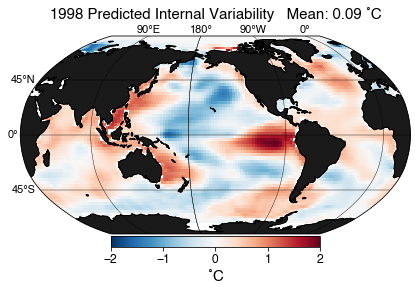

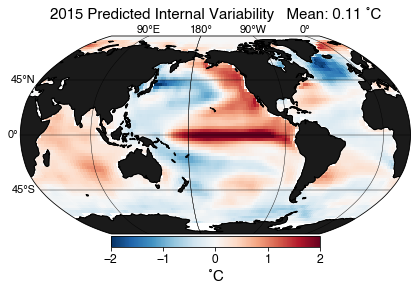

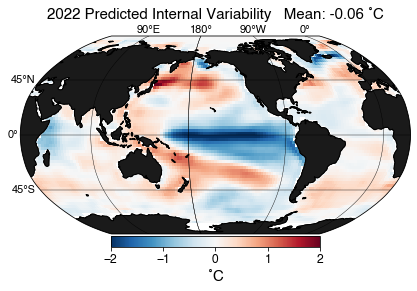

In [31]:
for plotyear in [1998, 2015, 2022]:
    yidx = plotyear - 2024

    # Panel 2: 2023 attribution to internal variability
    net_IV = metrics.weighted_mean(PIob[0,0,yidx,:,:,0], lats, lat_axis=0)
    net_IV_str = ('%.2f ˚C' % net_IV)
    fig = plot.plot_map(PIob[0,0,yidx,:,:,0], lats, lons, vmin=-2, vmax=2, title=str(plotyear) + ' Predicted Internal Variability   Mean: ' + net_IV_str, clabel='˚C', coords=True,);
    fig.savefig(base_dirs['figures'] + 'observations_' + str(plotyear) + '_PIte.png', dpi=300, transparent=True)
    fig.show()

### Figure S3, year-to-year change in the forced response

In [32]:
DF_each_year = metrics.weighted_mean(PFob[0,0,-23:,:,:,0]-PFob[0,0,-24:-1,:,:,0], lats, lat_axis=1, axis=(1,2))
DF_each_year = metrics.weighted_mean(PFob[0,0,-62+19:,:,:,0]-PFob[0,0,-63+19:-1,:,:,0], lats, lat_axis=1, axis=(1,2))

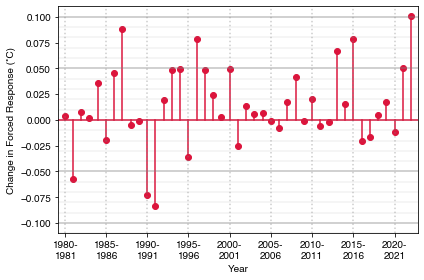

In [33]:
fig = plt.figure()

#for y,p in zip(np.arange(2001, 2024), DF_each_year):
for y,p in zip(np.arange(1981, 2024), DF_each_year):
    plt.plot(y,p, 'o', color='crimson')
    plt.plot([y,y], [0,p], color='crimson')

plt.axhline(0, color = 'crimson')
plt.ylim(-.11, .11)
plt.xlim(1980.2, 2023.8)
for i in np.arange(-.13,.14,.01):
    if i != 0:
        plt.axhline(i, alpha=.1, color='gray')
for i in np.arange(-.1,.15, .05):
    if i != 0:
        plt.axhline(i, alpha=.4, color='gray')

plt.ylabel('Change in Forced Response (˚C)')
plt.xlabel('Year')
ticklabs = []
ticklocs = []
for y in np.arange(1980,2025,5) + 1:
    plt.axvline(y, linestyle=':', alpha=.4, color='gray')
    ticklocs.append(y)
    ticklabs.append(str(y-1) + '-\n' + str(y))

plt.xticks(ticklocs,ticklabs)
plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'S3_everyyear_globalmeanchange_PFte.png', dpi=300, transparent=True)

### Figure S4, internal variability contributions each year

In [34]:
IV_each_year = metrics.weighted_mean(PIob[0,0,-26:,:,:,0], lats, lat_axis=1, axis=(1,2))

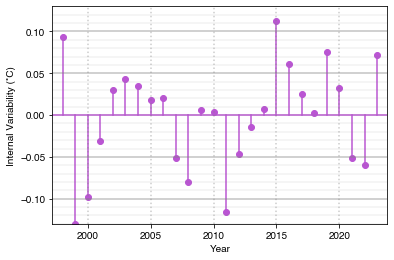

In [36]:
fig = plt.figure()

for y,p in zip(np.arange(1998, 2024), IV_each_year):
    plt.plot(y,p, 'o', color='mediumorchid')
    plt.plot([y,y], [0,p], color='mediumorchid')

plt.axhline(0, color = 'mediumorchid')
plt.ylim(-.13, .13)
plt.xlim(1997.2, 2023.8)
for i in np.arange(-.13,.14,.01):
    if i != 0:
        plt.axhline(i, alpha=.1, color='gray')
for i in np.arange(-.1,.15, .05):
    if i != 0:
        plt.axhline(i, alpha=.4, color='gray')
for i in np.arange(2000,2025, 5):
    plt.axvline(i, linestyle=':', alpha=.4, color='gray')

plt.ylabel('Internal Variability (˚C)')
plt.xlabel('Year')

fig.savefig(base_dirs['suppfigures'] + 'S4_everyyear_globalmean_PIte.png', dpi=300, transparent=True)


### Figure S5, triple-dip La Nina

/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_44100/3623516376.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


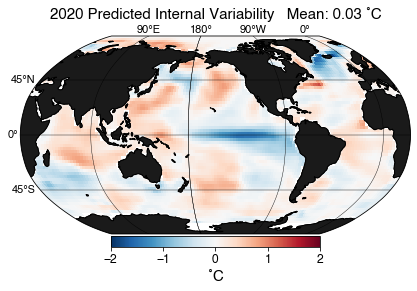

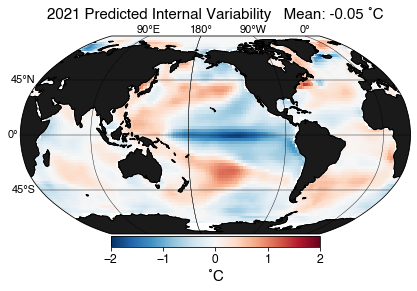

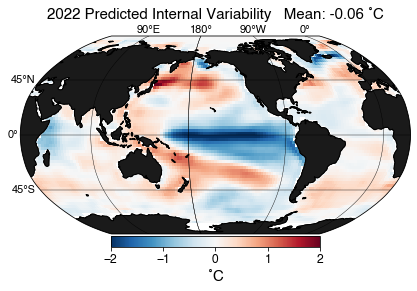

In [37]:
for plotyear in [2020, 2021, 2022]:
    yidx = plotyear - 2024

    # Panel 2: 2023 attribution to internal variability
    net_IV = metrics.weighted_mean(PIob[0,0,yidx,:,:,0], lats, lat_axis=0)
    net_IV_str = ('%.2f ˚C' % net_IV)
    fig = plot.plot_map(PIob[0,0,yidx,:,:,0], lats, lons, vmin=-2, vmax=2, title=str(plotyear) + ' Predicted Internal Variability   Mean: ' + net_IV_str, clabel='˚C', coords=True,);
    fig.savefig(base_dirs['suppfigures'] + 'S5_observations_' + str(plotyear) + '_PIte.png', dpi=300, transparent=True)
    fig.show()

### Figure S10: metrics from shuffling experiments

Open data

In [38]:
wR2tr_list = []
wR2va_list = []
wR2te_list = []

base_dirs = directories.get_dirs()
BASE_EXPERIMENTS = ["main_leave" + str(ileave) for ileave in range(5)]
for BASE in BASE_EXPERIMENTS:
    EXPERIMENTS = [BASE + '_seed' + str(iseed) for iseed in range(10)]

    wR2tr_leavelist = []
    wR2va_leavelist = []
    wR2te_leavelist = []

    for EXP in EXPERIMENTS:
        # Open the neural network
        __, settings_list = load_model(EXP, base_dirs)
        this_settings = settings_list[0]
        wR2tr_leavelist.append(this_settings['exp_results']['wR2_Itr'])
        wR2va_leavelist.append(this_settings['exp_results']['wR2_Iva'])
        wR2te_leavelist.append(this_settings['exp_results']['wR2_Ite'])
    wR2tr_list.append(wR2tr_leavelist)
    wR2va_list.append(wR2va_leavelist)
    wR2te_list.append(wR2te_leavelist)

wR2tr_list = np.array(wR2tr_list)
wR2va_list = np.array(wR2va_list)
wR2te_list = np.array(wR2te_list)

saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_metadata.json
saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_model


saved_models/main_leave0_seed1/2024-07-11_0236//main_leave0_seed1_seed1_metadata.json
saved_models/main_leave0_seed1/2024-07-11_0236//main_leave0_seed1_seed1_model


saved_models/main_leave0_seed2/2024-07-11_0236//main_leave0_seed2_seed2_metadata.json
saved_models/main_leave0_seed2/2024-07-11_0236//main_leave0_seed2_seed2_model


saved_models/main_leave0_seed3/2024-07-11_0236//main_leave0_seed3_seed3_metadata.json
saved_models/main_leave0_seed3/2024-07-11_0236//main_leave0_seed3_seed3_model


saved_models/main_leave0_seed4/2024-07-11_0236//main_leave0_seed4_seed4_metadata.json
saved_models/main_leave0_seed4/2024-07-11_0236//main_leave0_seed4_seed4_model


saved_models/main_leave0_seed5/2024-07-11_0236//main_leave0_seed5_seed5_metadata.json
saved_models/main_leave0_seed5/2024-07-11_0236//main_leave0_seed5_seed5_model


saved_models/main_leave0_seed6/2024-07-11_0236//main_leave0_seed6_seed6_metadata.json
saved_models/main_leave0_seed6/2024-07-11_0236//main_leave0_seed6_seed6_model


saved_models/main_leave0_seed7/2024-07-11_0236//main_leave0_seed7_seed7_metadata.json
saved_models/main_leave0_seed7/2024-07-11_0236//main_leave0_seed7_seed7_model


saved_models/main_leave0_seed8/2024-07-11_0236//main_leave0_seed8_seed8_metadata.json
saved_models/main_leave0_seed8/2024-07-11_0236//main_leave0_seed8_seed8_model


saved_models/main_leave0_seed9/2024-07-11_0236//main_leave0_seed9_seed9_metadata.json
saved_models/main_leave0_seed9/2024-07-11_0236//main_leave0_seed9_seed9_model


saved_models/main_leave1_seed0/2024-07-11_0236//main_leave1_seed0_seed0_metadata.json
saved_models/main_leave1_seed0/2024-07-11_0236//main_leave1_seed0_seed0_model


saved_models/main_leave1_seed1/2024-07-11_0236//main_leave1_seed1_seed1_metadata.json
saved_models/main_leave1_seed1/2024-07-11_0236//main_leave1_seed1_seed1_model


saved_models/main_leave1_seed2/2024-07-11_0236//main_leave1_seed2_seed2_metadata.json
saved_models/main_leave1_seed2/2024-07-11_0236//main_leave1_seed2_seed2_model


saved_models/main_leave1_seed3/2024-07-11_0236//main_leave1_seed3_seed3_metadata.json
saved_models/main_leave1_seed3/2024-07-11_0236//main_leave1_seed3_seed3_model


saved_models/main_leave1_seed4/2024-07-11_0236//main_leave1_seed4_seed4_metadata.json
saved_models/main_leave1_seed4/2024-07-11_0236//main_leave1_seed4_seed4_model


saved_models/main_leave1_seed5/2024-07-11_0236//main_leave1_seed5_seed5_metadata.json
saved_models/main_leave1_seed5/2024-07-11_0236//main_leave1_seed5_seed5_model


saved_models/main_leave1_seed6/2024-07-11_0236//main_leave1_seed6_seed6_metadata.json
saved_models/main_leave1_seed6/2024-07-11_0236//main_leave1_seed6_seed6_model


saved_models/main_leave1_seed7/2024-07-11_0236//main_leave1_seed7_seed7_metadata.json
saved_models/main_leave1_seed7/2024-07-11_0236//main_leave1_seed7_seed7_model


saved_models/main_leave1_seed8/2024-07-11_0236//main_leave1_seed8_seed8_metadata.json
saved_models/main_leave1_seed8/2024-07-11_0236//main_leave1_seed8_seed8_model


saved_models/main_leave1_seed9/2024-07-11_0236//main_leave1_seed9_seed9_metadata.json
saved_models/main_leave1_seed9/2024-07-11_0236//main_leave1_seed9_seed9_model


saved_models/main_leave2_seed0/2024-07-11_0236//main_leave2_seed0_seed0_metadata.json
saved_models/main_leave2_seed0/2024-07-11_0236//main_leave2_seed0_seed0_model


saved_models/main_leave2_seed1/2024-07-11_0236//main_leave2_seed1_seed1_metadata.json
saved_models/main_leave2_seed1/2024-07-11_0236//main_leave2_seed1_seed1_model


saved_models/main_leave2_seed2/2024-07-11_0236//main_leave2_seed2_seed2_metadata.json
saved_models/main_leave2_seed2/2024-07-11_0236//main_leave2_seed2_seed2_model


saved_models/main_leave2_seed3/2024-07-11_0236//main_leave2_seed3_seed3_metadata.json
saved_models/main_leave2_seed3/2024-07-11_0236//main_leave2_seed3_seed3_model


saved_models/main_leave2_seed4/2024-07-11_0236//main_leave2_seed4_seed4_metadata.json
saved_models/main_leave2_seed4/2024-07-11_0236//main_leave2_seed4_seed4_model


saved_models/main_leave2_seed5/2024-07-11_0236//main_leave2_seed5_seed5_metadata.json
saved_models/main_leave2_seed5/2024-07-11_0236//main_leave2_seed5_seed5_model


saved_models/main_leave2_seed6/2024-07-11_0236//main_leave2_seed6_seed6_metadata.json
saved_models/main_leave2_seed6/2024-07-11_0236//main_leave2_seed6_seed6_model


saved_models/main_leave2_seed7/2024-07-11_0236//main_leave2_seed7_seed7_metadata.json
saved_models/main_leave2_seed7/2024-07-11_0236//main_leave2_seed7_seed7_model


saved_models/main_leave2_seed8/2024-07-11_0236//main_leave2_seed8_seed8_metadata.json
saved_models/main_leave2_seed8/2024-07-11_0236//main_leave2_seed8_seed8_model


saved_models/main_leave2_seed9/2024-07-11_0236//main_leave2_seed9_seed9_metadata.json
saved_models/main_leave2_seed9/2024-07-11_0236//main_leave2_seed9_seed9_model


saved_models/main_leave3_seed0/2024-07-11_0236//main_leave3_seed0_seed0_metadata.json
saved_models/main_leave3_seed0/2024-07-11_0236//main_leave3_seed0_seed0_model


saved_models/main_leave3_seed1/2024-07-11_0236//main_leave3_seed1_seed1_metadata.json
saved_models/main_leave3_seed1/2024-07-11_0236//main_leave3_seed1_seed1_model


saved_models/main_leave3_seed2/2024-07-11_0236//main_leave3_seed2_seed2_metadata.json
saved_models/main_leave3_seed2/2024-07-11_0236//main_leave3_seed2_seed2_model


saved_models/main_leave3_seed3/2024-07-11_0236//main_leave3_seed3_seed3_metadata.json
saved_models/main_leave3_seed3/2024-07-11_0236//main_leave3_seed3_seed3_model


saved_models/main_leave3_seed4/2024-07-11_0236//main_leave3_seed4_seed4_metadata.json
saved_models/main_leave3_seed4/2024-07-11_0236//main_leave3_seed4_seed4_model


saved_models/main_leave3_seed5/2024-07-11_0236//main_leave3_seed5_seed5_metadata.json
saved_models/main_leave3_seed5/2024-07-11_0236//main_leave3_seed5_seed5_model


saved_models/main_leave3_seed6/2024-07-11_0236//main_leave3_seed6_seed6_metadata.json
saved_models/main_leave3_seed6/2024-07-11_0236//main_leave3_seed6_seed6_model


saved_models/main_leave3_seed7/2024-07-11_0236//main_leave3_seed7_seed7_metadata.json
saved_models/main_leave3_seed7/2024-07-11_0236//main_leave3_seed7_seed7_model


saved_models/main_leave3_seed8/2024-07-11_0236//main_leave3_seed8_seed8_metadata.json
saved_models/main_leave3_seed8/2024-07-11_0236//main_leave3_seed8_seed8_model


saved_models/main_leave3_seed9/2024-07-11_0236//main_leave3_seed9_seed9_metadata.json
saved_models/main_leave3_seed9/2024-07-11_0236//main_leave3_seed9_seed9_model


saved_models/main_leave4_seed0/2024-07-11_0236//main_leave4_seed0_seed0_metadata.json
saved_models/main_leave4_seed0/2024-07-11_0236//main_leave4_seed0_seed0_model


saved_models/main_leave4_seed1/2024-07-11_0236//main_leave4_seed1_seed1_metadata.json
saved_models/main_leave4_seed1/2024-07-11_0236//main_leave4_seed1_seed1_model


saved_models/main_leave4_seed2/2024-07-11_0236//main_leave4_seed2_seed2_metadata.json
saved_models/main_leave4_seed2/2024-07-11_0236//main_leave4_seed2_seed2_model


saved_models/main_leave4_seed3/2024-07-11_0236//main_leave4_seed3_seed3_metadata.json
saved_models/main_leave4_seed3/2024-07-11_0236//main_leave4_seed3_seed3_model


saved_models/main_leave4_seed4/2024-07-11_0236//main_leave4_seed4_seed4_metadata.json
saved_models/main_leave4_seed4/2024-07-11_0236//main_leave4_seed4_seed4_model


saved_models/main_leave4_seed5/2024-07-11_0236//main_leave4_seed5_seed5_metadata.json
saved_models/main_leave4_seed5/2024-07-11_0236//main_leave4_seed5_seed5_model


saved_models/main_leave4_seed6/2024-07-11_0236//main_leave4_seed6_seed6_metadata.json
saved_models/main_leave4_seed6/2024-07-11_0236//main_leave4_seed6_seed6_model


saved_models/main_leave4_seed7/2024-07-11_0236//main_leave4_seed7_seed7_metadata.json
saved_models/main_leave4_seed7/2024-07-11_0236//main_leave4_seed7_seed7_model


saved_models/main_leave4_seed8/2024-07-11_0236//main_leave4_seed8_seed8_metadata.json
saved_models/main_leave4_seed8/2024-07-11_0236//main_leave4_seed8_seed8_model


saved_models/main_leave4_seed9/2024-07-11_0236//main_leave4_seed9_seed9_metadata.json
saved_models/main_leave4_seed9/2024-07-11_0236//main_leave4_seed9_seed9_model


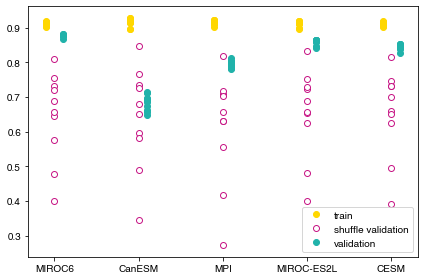

In [14]:
fig, ax1 = plt.subplots() 

ax1.plot(np.arange(5)-.1, wR2tr_list, 'o', color='gold', )
ax1.plot(np.arange(5), wR2va_list, 'o', color='mediumvioletred', markerfacecolor='white',)
ax1.plot(np.arange(5)+.1, wR2te_list, 'o', color='lightseagreen',)
ax1.plot([np.nan], [np.nan], 'o', color='gold', label='train', )
ax1.plot([np.nan], [np.nan], 'o', color='mediumvioletred', markerfacecolor='white', label='shuffle validation')
ax1.plot([np.nan], [np.nan], 'o', color='lightseagreen', label='validation')
plt.legend()
plt.xticks(np.arange(5), ['MIROC6', 'CanESM', 'MPI', 'MIROC-ES2L', 'CESM']);

plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'S8_shuffle_performance.png', dpi=300, transparent=True,)

### Figure S9: shuffle example

In [15]:
model, settings = load_model('main_leave0_seed0', base_dirs)
model = model[0]
settings = settings[0]
Atr, Ava, Ate, Aob, Ftr, Fva, Fte, Itr, Iva, Ite, \
            Xtr, Xva, Xte, Xob, Xshapes, Ttr, Tva, Tte, Tshapes, \
            Tmean, Tstd, lats, lons, M = data_methods.prepare_data(this_settings, base_dirs)

network_methods.compile_CVED(model, settings)


# Test set predictions
Ptr = model.predict(Xtr)
_ = gc.collect()
PItr = data_methods.unstandardize_predictions(Ptr, Tmean, Tstd, Tshapes[0], M)
PFtr = Atr[..., 0:1] - PItr

# Val set predictions
Pva = model.predict(Xva)
_ = gc.collect()
PIva = data_methods.unstandardize_predictions(Pva, Tmean, Tstd, Tshapes[1], M)
PFva = Ava[..., 0:1] - PIva

# Test set predictions
Pte = model.predict(Xte)
_ = gc.collect()
PIte = data_methods.unstandardize_predictions(Pte, Tmean, Tstd, Tshapes[2], M)
PFte = Ate[..., 0:1] - PIte

saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_metadata.json
saved_models/main_leave0_seed0/2024-07-11_0236//main_leave0_seed0_seed0_model


/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2024/ForcedTrend/data_methods.py:477: RuntimeWarning: Mean of empty slice
  Dmean = np.nanmean(basis, axis=(0,1,2))[None, None, None, ...]
/Users/Jamin/miniforge3/envs/forcetrend/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


58/58 [==============================] - 9s 158ms/step


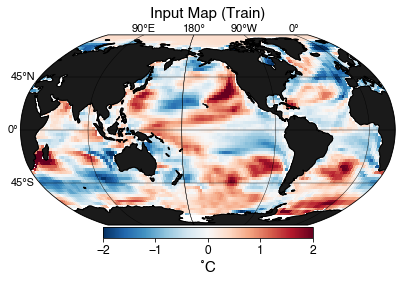

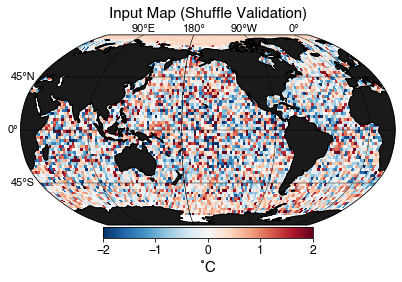

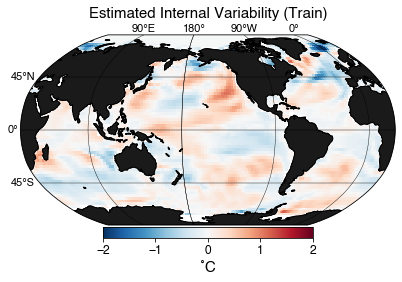

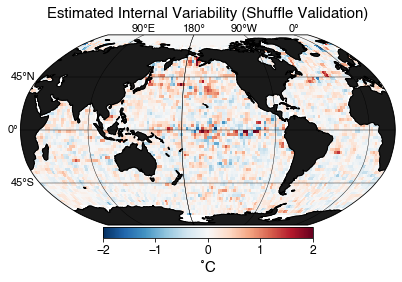

In [23]:
fig = plot.plot_map(Xtr[0,:,:,0], lats, lons, vmin=-2, vmax=2, title='Input Map (Train)', clabel='˚C', coords=True,);
plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'S7_input_train.png', dpi=300, transparent=True)
fig = plot.plot_map(Xva[0,:,:,0], lats, lons, vmin=-2, vmax=2, title='Input Map (Shuffle Validation)', clabel='˚C', coords=True,);
plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'S7_input_shuf.png', dpi=300, transparent=True)
fig = plot.plot_map(PItr[0,0,0,:,:,0], lats, lons, vmin=-2, vmax=2, title='Estimated Internal Variability (Train)', clabel='˚C', coords=True,);
plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'S7_pred_train.png', dpi=300, transparent=True)
fig = plot.plot_map(PIva[0,0,0,:,:,0], lats, lons, vmin=-2, vmax=2, title='Estimated Internal Variability (Shuffle Validation)', clabel='˚C', coords=True,);
plt.tight_layout()
fig.savefig(base_dirs['suppfigures'] + 'S7_pred_shuf.png', dpi=300, transparent=True)

### Schematic of the Attribution Framework, in Figure 1

In [3]:
# base_dirs = directories.get_dirs()
# EXP = 'final_seed0'
# # Open the neural network
# model_list, settings_list = load_model(EXP, base_dirs)
# model = model_list[0]
# settings = settings_list[0]
# network_methods.compile_CVED(model, settings)
# # Prepare the data
# Atr, Ava, Ate, Aob, Ftr, Fva, Fte, Itr, Iva, Ite, \
#     Xtr, Xva, Xte, Xob, Xshapes, Ttr, Tva, Tte, Tshapes, \
#     Tmean, Tstd, lats, lons, M = data_methods.prepare_data(settings, base_dirs)

# # Test set predictions
# Pte = model.predict(Xte)
# _ = gc.collect()
# PIte = data_methods.unstandardize_predictions(Pte, Tmean, Tstd, Tshapes[2], M)
# PFte = Ate[..., 0:1] - PIte

# # Predictions for observations
# Pob = model.predict(Xob)
# _ = gc.collect()
# PIob = data_methods.unstandardize_predictions(Pob, Tmean, Tstd, Aob.shape, M)
# PFob = Aob[..., 0:1] - PIob

In [4]:
# imp.reload(plot)
# inn = 4
# iyr = 60
# # Panel 1: Example Input Map
# fig = plot.plot_map(Ate[0,0,iyr,...,0], lats, lons, vmin=None, vmax=None, clabel='˚C',);
# fig.savefig(base_dirs['figures'] + 'schematic_panel_1_Ate.png', dpi=300, transparent=True)
# fig.show()

# # Panel 2: Processed Input Map
# fig = plot.plot_map(Xte[iyr,...,0], lats, lons, vmin=-3, vmax=,);
# fig.savefig(base_dirs['figures'] + 'schematic_panel_2_Xte.png', dpi=300, transparent=True)
# fig.show()

# # Panel 3: Example Output Map
# fig = plot.plot_map(Pte[iyr,...,0], lats, lons, vmin=-3, vmax=3,);
# fig.savefig(base_dirs['figures'] + 'schematic_panel_3_Pte.png', dpi=300, transparent=True)
# fig.show()

# # Panel 4: Processed Output Map
# fig = plot.plot_map(PIte[0,0,iyr,...,0], lats, lons, vmin=-1, vmax=1, clabel='˚C');
# fig.savefig(base_dirs['figures'] + 'schematic_panel_4_PIte.png', dpi=300, transparent=True)
# fig.show()

# # Panel 5: Processed Output Map
# fig = plot.plot_map(PFte[0,0,iyr,...,0], lats, lons, vmin=None, vmax=None, clabel='˚C');
# fig.savefig(base_dirs['figures'] + 'schematic_panel_5_PFte.png', dpi=300, transparent=True)
# fig.show()

# # Panel 6: Processed Output Map
# fig = plot.plot_map(Ite[0,0,iyr,...,0], lats, lons, vmin=-1, vmax=1, clabel='˚C');
# fig.savefig(base_dirs['figures'] + 'schematic_panel_6_Ite.png', dpi=300, transparent=True)
# fig.show()

# # Panel 7: Processed Output Map
# fig = plot.plot_map(Fte[0,0,iyr,...,0], lats, lons, vmin=None, vmax=None, clabel='˚C');
# fig.savefig(base_dirs['figures'] + 'schematic_panel_7_Fte.png', dpi=300, transparent=True)
# fig.show()